### CPA - Handling a large graph

#### Pour tester le programme, il faut exécuter chaque blocs les uns à la suite des autres :
- Cliquez sur le bloc de code
- Appuyez sur Ctrl + Enter

#### Remarque : 
La fonction open() de python ne charge pas un fichier en mémoire, elle donne seulement l'accès. <br />
La mémoire maximale utilisée ne dépassera pas une ligne pour chaque itération de lecture dans le fichier.

### Question 2

In [2]:
# Les noeuds sans liens sont comptés dans cet exemple.

def print_details(file):
    nb_sommets = 0
    nb_edges = 0
    with open(file, "r") as f:
        for e in f:
            if e.startswith("#"):
                continue
            nb_edges = nb_edges + 1
            indice_points = e.split(" ")

            if nb_sommets == 0:
                nb_sommets = int(indice_points[0])
            elif int(indice_points[0]) > int(nb_sommets):
                nb_sommets = indice_points[0]
            elif int(indice_points[1]) > int(nb_sommets):
                nb_sommets = int(indice_points[1].rstrip('\n'))

    print("Nombre d'arêtes : " + str(nb_edges))
    print("Nombre de sommets : " + str(nb_sommets + 1))

print("Data :")
graph = open("graphs/email-Eu-core.txt/data", "r")
print_details("graphs/email-Eu-core.txt/data")

Data :
Nombre d'arêtes : 25571
Nombre de sommets : 1005


### Question 3

#### Notre méthode de nettoyage de donnée suit les étpaes suivantes :
- Pour chaque edge, trier les points pour que le plus petit sommet se trouve en debut de ligne dans le fichier
- Ecrire en parallèle chaque résultat dans un fichier sorted_data
- Ecrire dans un fichier cleaned_data chaque edge en evitant de creer des doublons

In [3]:
# On trie les edges dans un nouveau fichier sorted_data
# Pour chaque edge, on met le point d'indice plus petit en debut de ligne

graph = open("graphs/email-Eu-core.txt/data", "r")
sorted_graph = open("graphs/email-Eu-core.txt/sorted_data", "w+")
for e in graph:
    e = e.rstrip("\n")
    array_e = e.split(" ")
    if(int(array_e[0]) > int(array_e[1])):
        array_e[0],array_e[1] = array_e[1],array_e[0]
        str_e = ' '.join(array_e)
        sorted_graph.write(str_e + "\n")
        continue
    str_e = ' '.join(array_e)
    sorted_graph.write(str_e + "\n")

sorted_graph.close()
graph.close()

# A partir de sorted_data
# on cree un fichier cleaned_data contenant les edges sans doublon

sorted_graph = open("graphs/email-Eu-core.txt/sorted_data", "r")
cleaned_graph = open("graphs/email-Eu-core.txt/cleaned_data", "w+")
for e in sorted_graph:
    e = e.rstrip("\n")
    indice_point = e.split(" ")
    if int(indice_point[0]) == int(indice_point[1]):
        continue
    if not(e in cleaned_graph):
        cleaned_graph.write(str(e) + "\n")
    
cleaned_graph.close()
sorted_graph.close()

# On affiche des informations concernant les fichiers crees

print("Sorted Data :")
print_details("graphs/email-Eu-core.txt/sorted_data")
print("\n")
print("Cleaned Data :")
print_details("graphs/email-Eu-core.txt/cleaned_data")

Sorted Data :
Nombre d'arêtes : 25571
Nombre de sommets : 1005


Cleaned Data :
Nombre d'arêtes : 24929
Nombre de sommets : 1005


### Question 4

- La premiere partie du code sert à savoir quel est le sommet le plus grand noté i
- Une fois calculé, nous allons initialiser une matrice de dimension (i x 2), qui va nous servir à stocker le nombre de voisins de chaque sommet.
- Exemple : <BR/>
[[0,2],[1,5],[2,8],[3,2],[4,1],[5,2]] <BR/>
Le degré du sommet 0 est 2, de 1 est 5, de 2 est 8 etc ..
- Une fois remplie nous allons stocker son contenu dans un fichier degree_data.


In [19]:
cleaned_data = open("graphs/email-Eu-core.txt/cleaned_data", "r")

# Calcul du sommet le plus grand.
i = 0
for e in cleaned_data:
    e = e.rstrip("\n")
    indice_point = e.split(" ")
    if(int(indice_point[0]) > int(i)):
        i = int(indice_point[0])
    if(int(indice_point[1]) > int(i)):
        i = int(indice_point[1])

# degreees_array : matrice représentant le nombre de voisin pour chaque sommet
degrees_array = [[str(j),0] for j in range(i+1)]

cleaned_data = open("graphs/email-Eu-core.txt/cleaned_data", "r")
degree_data = open("graphs/email-Eu-core.txt/degree_data", "w+")

# Remplissage de la matrice degrees_array
# par le nombre de voisins correpondant à chaque sommet

for e in cleaned_data:
    e = e.rstrip("\n")
    indice_point = e.split(" ")
    d0 = degrees_array[int(indice_point[0])][1] + 1
    d1 = degrees_array[int(indice_point[1])][1] + 1
    degrees_array[int(indice_point[0])][1] = d0
    degrees_array[int(indice_point[1])][1] = d1

# Remplissage du fichier à partir de la matrice
for l in degrees_array:
    degree_data.write(l[0]+" "+str(l[1])+"\n")
degree_data.close()

### Question 5 et 6
- Faire 2 deux fois Ctrl + Entrée pour afficher l'histogramme

In [5]:
import time
# ********************** Question 5 ********************** #

cleaned_graph = open("graphs/email-Eu-core.txt/cleaned_data", "r")
cleaned_graph_deg = open("graphs/email-Eu-core.txt/degree_data", "r")

# Attributs utilises dans la fonction question5()
result = 0
Du = 0
Dv = 0

# Fonction qui retourne une hashmap
# a partir du fichier qui associe chaque sommet a son degres
def former_hashmap(file):
    hashmap = dict()
    for e in file:
        e = e.rstrip("\n")
        indice_point_1 = e.split(" ")
        hashmap[indice_point_1[0]] = int(indice_point_1[1])
    return hashmap

# Fonction qui retourne la somme des produits des degres 
# de chaque point appartenant a un edge
def question5(cleaned_graph,hashmap):
    result = 0
    for e in cleaned_graph:
        e = e.rstrip("\n")
        indice_point_1 = e.split(" ")
        p = (int(hashmap[indice_point_1[0]]) * int(hashmap[indice_point_1[1]]))
        result = result + p
    return result

# Main et affichage du resultat pour la question 5
map_sommet_deg = former_hashmap(cleaned_graph_deg)
now = time.time()
result = question5(cleaned_graph,map_sommet_deg)
after = time.time()
print("La quantité est : Q = " + str(result))
print("L'algorithme est executé en " + str((after-now))+ " secondes")

# On ferme les fichiers
cleaned_graph_deg.close()
cleaned_graph.close()

La quantité est : Q = 366958786
L'algorithme est executé en 0.06396341323852539 secondes


La comparaison entre les differents fichier est faite sur le rapport.

Résultat de la question 6 ci-dessous :


<BarContainer object of 189 artists>

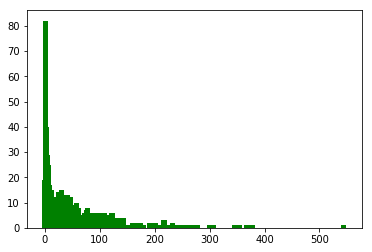

In [7]:
# ********************** Question 6 ********************** #

import matplotlib.pyplot as plt

# On effectue un sort() pour avoir un histogramme dans l'ordre
list(set(list(map_sommet_deg.values()))).sort()
degrees = set(list(map_sommet_deg.values()))

# On cree un dictionnaire associant les degres a leur distribution
degrees_dist = dict()
for d in degrees:
    degrees_dist[d] = list(map_sommet_deg.values()).count(d)

# On affiche l'histogramme
print("Résultat de la question 6 ci-dessous :")
plt.bar(degrees_dist.keys(), degrees_dist.values(), 10, color='g')

- Abscisse = Degrés
- Ordonné = Nombre d'occurences de ces degrès <BR/> 

On remarque qu'il y a beaucoup plus de degrès entre 0 et 30 que entre 30 et plus, on peut affirmer que les sommets ne sont pas connectés en majorité à plus de 30 autres sommets.

### Question 7

### Liste de edges

In [8]:
cleaned_graph = open("graphs/email-Eu-core.txt/cleaned_data", "r")

# ******* Structure de données : liste de edges *******
edges = []
for e in cleaned_graph:
    e = e.rstrip("\n")
    indice_point_1 = e.split(" ")
    edges.append([int(indice_point_1[0]),int(indice_point_1[1])])

cleaned_graph.close()

### Matrice d'adjacence

In [9]:
# ******* Structure de données: Matrice d'adjacence *******

# Dans le graph, trouver le sommet d'indice maximum pour initialiser une matrice
cleaned_graph = open("graphs/email-Eu-core.txt/cleaned_data", "r")
max_int = -1
for e in cleaned_graph:
    e = e.rstrip("\n")
    indice_point_1 = e.split(" ")
    if int(indice_point_1[0])>max_int:
        max_int = int(indice_point_1[0])
    if int(indice_point_1[1])>max_int:
        max_int = int(indice_point_1[1])
        
# Creation de la matrice d'adjacence
matrice = [[0]* (max_int+1) for j in range(max_int+1)]
for e in cleaned_graph:
    e = e.rstrip("\n")
    indice_point_1 = e.split(" ")
    matrice[int(indice_point_1[0])][int(indice_point_1[1])] = 1

cleaned_graph.close()

### Liste d'adjacence

In [10]:
# Structure de données: Liste d'adjacence

# Dans le graph, trouver le sommet d'indice maximum pour initialiser une matrice
cleaned_graph = open("graphs/email-Eu-core.txt/cleaned_data", "r")
max_int = -1
for e in cleaned_graph:
    e = e.rstrip("\n")
    indice_point_1 = e.split(" ")
    if int(indice_point_1[0])>max_int:
        max_int = int(indice_point_1[0])
    if int(indice_point_1[1])>max_int:
        max_int = int(indice_point_1[1])
cleaned_graph.close()

cleaned_graph = open("graphs/email-Eu-core.txt/cleaned_data", "r")
map_sommet_voisin = dict()
for i in range(max_int+1):
    map_sommet_voisin[i] = list()
for e in cleaned_graph:
    e = e.rstrip("\n")
    indice_point_1 = e.split(" ")
    if(not(int(indice_point_1[1]) in map_sommet_voisin[int(indice_point_1[0])])):
        map_sommet_voisin[int(indice_point_1[0])].append(int(indice_point_1[1]))
    if(not(int(indice_point_1[0]) in map_sommet_voisin[int(indice_point_1[1])])):
        map_sommet_voisin[int(indice_point_1[1])].append(int(indice_point_1[0]))

cleaned_graph.close()

La comparaison entre les differentes structures est faite sur le rapport.

### Question 8

#### Implémentation du parcours en largeur

In [11]:
# Algorithme Breadth First Search

import collections

def BFS(graph, racine,visit_map): 
    visited, queue = set(), collections.deque([racine])
    bfs_list = []
    visited.add(racine)
    visit_map[racine] = True
    bfs_list.append(racine)
    diametre = 0
    while queue: 
        sommet = queue.popleft()
        diametre = diametre + 1
        for voisin in graph[sommet]: 
            if voisin not in visited: 
                bfs_list.append(voisin)
                visited.add(voisin)
                visit_map[voisin] = True
                queue.append(voisin)
    return bfs_list

#### Recherche de la  composante la plus large

On initialise un dictionnaire de sommets visités nommé visited
 et à chaque fois qu'on visite un sommet on met la value correspondante dans visited à True, ce qui nous permet de ne pas
reitérer BFS sur tout les noeuds donc on gagne du temps de calcul conséquent.

Sachant aussi que les sommets sans edges constituent une composante. <BR/> liste_resultat =  liste de nos composantes

In [12]:
l1 = list(map_sommet_voisin.keys())
visited = dict()
for i in l1:
    visited[i] = False
liste_resultat = []
for i in l1:
    if visited[i] ==  False:
        l = BFS(map_sommet_voisin,i,visited)
        liste_resultat.append([l])

Ici on est entrain de chercher la composante connexe la plus large (en nombre de sommets), ici représentée par l'indice "indi_max".

In [13]:
size_max = -1
indi = 0
indice_max = -1
lu = []
for l in liste_resultat:
    n = len(l[0])
    if n>size_max:
        indice_max = indi
        size_max = n
        lu = l
    indi = indi + 1
print("Indice de la composante la plus large " + str(indice_max))
print("Composante la plus large " + str(len(lu[0])))

Indice de la composante la plus large 0
Composante la plus large 986


#### Calcul du diametre du graphe

Cette version de l'algorithme BFS retourne le diametre de la composante courante. 

In [14]:
# Algorithme Breadth First Search 

import collections

def BFS_2(graph, racine,map_visit): 
    visited, queue = set(), collections.deque([racine])
    bfs_list = []
    visited.add(racine)
    map_visit[racine] = True
    bfs_list.append(racine)
    diametre = 0
    while queue: 
        sommet = queue.popleft()
        
        j = 0
        for voisin in graph[sommet]: 
            if (j== len(graph[sommet])):
                diametre = diametre + 1 
            
            if voisin not in visited: 
                diametre = diametre + 1
                bfs_list.append(voisin)
                visited.add(voisin)
                map_visit[voisin] = True
                queue.append(voisin)
            j = j + 1
    return diametre

La borne inférieure est stocké dans le minimum de la liste_resultat.

Nous allons chercher la borne inférieure du diametre du graphe, nous allons le calculer pour chaque composante connexe sa frontiere et garder la borne inférieur du domaine de toutes les frontieres des composantes connexes sans compter les composante connexes composées d'un seul sommet.

In [15]:
l1 = list(map_sommet_voisin.keys())
visited = dict()
for i in l1:
    visited[i] = False
liste_frontieres = []
for i in l1:
    if visited[i] ==  False:
        l = BFS_2(map_sommet_voisin,i,visited)
        liste_frontieres.append(l)
s = set(liste_frontieres)
s.remove(0)
min(s) ## Borne inférieure

985

### Question 9

On itere sur chaque sommet noté v, et on boucle sur ses voisins avec u et on boucle sur l'intersection des voisins de u et de v avec k.<BR/>
On obtient le triplet u,v,k, c'est notre triangle et on incrémente le nombre de triangles. 

Notre algorithme compte chaque triangle 3 fois, cependant nous aurions pu résoudre ce problème en testant si on a deja calculé le triangle ou en utilisant la méthode présentée en cours du degré minimum, au préalable il aurait fallu trier la liste des voisins par degré minimum.

On réussit donc à compter le nombre de triangle en divisant par 3 le nombre calculé avec l'algorithme, idem pour le nombre de triangle par sommet.

In [17]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

nb_triangle = 0
# Stocker le nombre de triangle pour chaque sommet.
number_triangles = dict()
for i in list(map_sommet_voisin.keys()):
    number_triangles[i] = 0

now = time.time()
#Debut de l'algorithme
k = None
u = None
v = None
for v, voisin in map_sommet_voisin.items():
    for u in voisin:
        if v<u:
            for k in intersection(map_sommet_voisin[v],map_sommet_voisin[u]):
                number_triangles[k]  = number_triangles[k] + 1
                number_triangles[u]  = number_triangles[u] + 1
                number_triangles[v]  = number_triangles[v] + 1
                nb_triangle = nb_triangle + 1
    if(not(k is None) and not(u is None) and not(v is None)):
        number_triangles[k]  = int(number_triangles[k]/3) 
        number_triangles[u]  = int(number_triangles[u]/3)
        number_triangles[v]  = int(number_triangles[v]/3)
#Fin de l'algorithme
after = time.time()
print("Temps d execution "+ str(after-now))
print("Nombre de triangles total : " + str(nb_triangle/3))       

Temps d execution 0.6373817920684814
Nombre de triangles total : 105461.0
